In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [4]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("./bank-additional_clean.csv", index_col = 0)
df.head()

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,NaN,housemaid,married,basic 4y,No,No,No,telephone,261,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,57.0,services,married,high school,NaN,No,No,telephone,149,1,NaN,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,37.0,services,married,high school,No,Si,No,telephone,226,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,40.0,admin.,married,basic 6y,No,No,No,telephone,151,1,NaN,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,56.0,services,married,high school,No,No,Si,telephone,307,1,NaN,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad


# Medidas de correlación




In [5]:
from itertools import combinations

# definimos la lista los nombres de las variables numéricas 
numericas = df.select_dtypes(include = np.number).columns

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))

# printeamos los resultados, una lista de tuplas
combinaciones

[('income', 'kidhome'),
 ('income', 'teenhome'),
 ('income', 'numwebvisitsmonth'),
 ('income', 'age'),
 ('income', 'duration'),
 ('income', 'campaign'),
 ('income', 'pdays'),
 ('income', 'previous'),
 ('income', 'empvarrate'),
 ('income', 'conspriceidx'),
 ('income', 'consconfidx'),
 ('income', 'euribor3m'),
 ('income', 'latitude'),
 ('income', 'longitude'),
 ('income', 'contact_year'),
 ('kidhome', 'teenhome'),
 ('kidhome', 'numwebvisitsmonth'),
 ('kidhome', 'age'),
 ('kidhome', 'duration'),
 ('kidhome', 'campaign'),
 ('kidhome', 'pdays'),
 ('kidhome', 'previous'),
 ('kidhome', 'empvarrate'),
 ('kidhome', 'conspriceidx'),
 ('kidhome', 'consconfidx'),
 ('kidhome', 'euribor3m'),
 ('kidhome', 'latitude'),
 ('kidhome', 'longitude'),
 ('kidhome', 'contact_year'),
 ('teenhome', 'numwebvisitsmonth'),
 ('teenhome', 'age'),
 ('teenhome', 'duration'),
 ('teenhome', 'campaign'),
 ('teenhome', 'pdays'),
 ('teenhome', 'previous'),
 ('teenhome', 'empvarrate'),
 ('teenhome', 'conspriceidx'),
 ('teen

Usaremos un gráfico de dispersión para observar cómo se distribuyen los puntos. Por ejemplo:
   - En una relación lineal, los puntos forman aproximadamente una línea recta.
   - En una relación monotónica, los puntos tienden a aumentar o disminuir juntos, aunque no formen una línea recta.

Para interpretarlos tener en cuenta:
   
   - Si ves una línea ascendente o descendente, podría haber una relación lineal.
   - Si los datos muestran una tendencia general pero no constante, puede ser una relación monotónica.

A continuación os mostramos algunos ejemplos con las variables, pero no todas. En próximas lecciones os enseñaremos a hacerlo de una manera más objetiva y rápida.

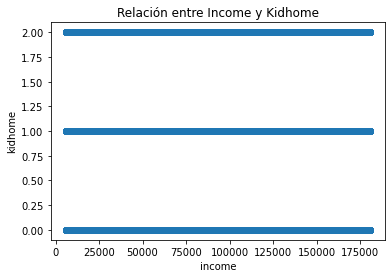

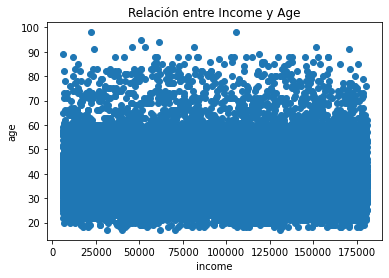

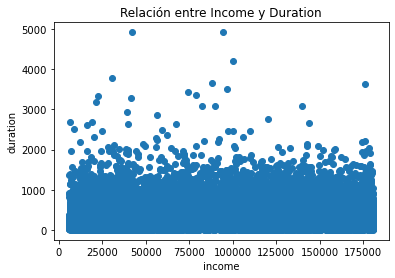

In [8]:
## Identificar el tipo de relación entre las variables
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
    
# Crear un gráfico de dispersión para cada una de las combinaciones de variables
plt.scatter(df["income"], df["kidhome"])
plt.xlabel("income")
plt.ylabel("kidhome")
plt.title("Relación entre Income y Kidhome")
plt.show()

plt.scatter(df["income"], df["age"])
plt.xlabel("income")
plt.ylabel("age")
plt.title("Relación entre Income y Age")
plt.show()

plt.scatter(df["income"], df["duration"])
plt.xlabel("income")
plt.ylabel("duration")
plt.title("Relación entre Income y Duration")
plt.show()

Vamos a interpretar los resultados de la correlación entre las variables.

Relación entre Income y Kidhome
- Este gráfico muestra puntos distribuidos de forma horizontal en diferentes niveles. Basándome en esto, parece que no hay una relación clara entre las dos variables (eje X y eje Y). Esto indica sin correlación, ya que los valores de una variable no parecen depender de los valores de la otra.


Relación entre Income y age
- Este gráfico muestra una nube de puntos dispersos uniformemente en un rango amplio, sin una tendencia clara hacia arriba o abajo. Esto indica nuevamente sin correlación entre las dos variables, ya que no se observa un patrón consistente entre los valores de los ejes X e Y. El coeficiente de correlación (r) para este caso también estaría cercano a 0, lo que refuerza la falta de relación entre las variables.

Relación entre Income y Duration
- En este gráfico, los puntos parecen estar mayormente concentrados en la parte inferior, pero con algunos valores dispersos hacia arriba. Esto podría sugerir una correlación débil o inexistente. No se observa un patrón claro entre las variables del eje X e Y (como una tendencia lineal o monotónica), por lo que, aunque existen valores dispersos, la relación entre las variables parece ser mínima. El coeficiente de correlación (r) probablemente estará cerca de 0, indicando que no hay una relación significativa entre las variables.


**Te proponemos que hagas un análisis similar con el resto de variables antes de continuar.  Nosotras lo hemos hecho y hemos llegado a la conclusión de que no hay correlación entre las variables.**

In [12]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df.corr( method = "spearman")
df_correlaciones

,income,kidhome,teenhome,numwebvisitsmonth,age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,latitude,longitude,contact_year
income,1.000000,0.001324,0.006487,0.002504,0.004258,0.000232,0.006174,-0.002100,0.000933,-0.006900,-0.011591,0.000356,-0.000892,-0.004433,0.000374,-0.003710
kidhome,0.001324,1.000000,-0.001353,-0.005612,0.000830,-0.003467,0.003005,-0.015418,-0.003948,-0.003666,0.001582,-0.004570,-0.004401,-0.002130,0.002334,-0.006145
teenhome,0.006487,-0.001353,1.000000,-0.002801,-0.001245,-0.002008,0.001433,-0.019725,0.000582,0.000864,0.004169,0.000331,-0.003790,-0.001550,-0.001425,-0.012764
numwebvisitsmonth,0.002504,-0.005612,-0.002801,1.000000,-0.007542,0.008602,0.003152,0.001379,-0.002181,-0.007394,-0.003011,0.006337,-0.005567,0.002823,-0.002216,0.005989
age,0.004258,0.000830,-0.001245,-0.007542,1.000000,-0.001126,0.005575,-0.066585,-0.011335,0.043239,0.043953,0.112173,0.054092,0.001082,0.005701,-0.002306
duration,0.000232,-0.003467,-0.002008,0.008602,-0.001126,1.000000,-0.080843,0.104125,0.043158,-0.068606,0.002626,-0.007817,-0.079689,-0.002437,0.002615,-0.004065
campaign,0.006174,0.003005,0.001433,0.003152,0.005575,-0.080843,1.000000,0.059713,-0.088285,0.156665,0.098602,-0.000443,0.144192,-0.005869,0.002948,-0.003145
pdays,-0.002100,-0.015418,-0.019725,0.001379,-0.066585,0.104125,0.059713,1.000000,-0.005649,0.153660,0.153776,-0.023308,-0.078987,-0.016165,-0.003925,0.016045
previous,0.000933,-0.003948,0.000582,-0.002181,-0.011335,0.043158,-0.088285,-0.005649,1.000000,-0.434810,-0.281568,-0.113894,-0.459793,0.012975,-0.010237,-0.000631
empvarrate,-0.006900,-0.003666,0.000864,-0.007394,0.043239,-0.068606,0.156665,0.153660,-0.434810,1.000000,0.666555,0.222928,0.940472,-0.009862,0.001162,0.004107


**Interpretación de los resultados**

La fuerza de una correlación se evalúa en función del valor absoluto del coeficiente de correlación. Algunos criterios para decidir si la relación es fuerte, moderada o débil son: 

1. **Correlación Débil**:

   - El valor absoluto del coeficiente de correlación está cerca de 0.

   - Por lo general, se considera una correlación débil si el valor absoluto está por debajo de 0.3.

2. **Correlación Moderada**:

   - El valor absoluto del coeficiente de correlación está en el rango de 0.3 a 0.7.

   - Se considera una correlación moderada si el valor absoluto está en este rango.

3. **Correlación Fuerte**:

   - El valor absoluto del coeficiente de correlación es igual o superior a 0.7.

   - Se considera una correlación fuerte si el valor absoluto está en este rango.

1. **Income**: La variable "income" (ingresos) muestra una correlación positiva muy débil con la mayoría de las otras variables. Esto significa que no hay una relación fuerte y clara entre los ingresos y las demás variables. La correlación positiva sugiere que a medida que los ingresos aumentan ligeramente, algunas de las otras variables también tienden a aumentar ligeramente, pero la magnitud de esta relación es muy pequeña.

2. **Kidhome**: La variable "kidhome" (número de niños en el hogar) muestra correlaciones negativas débiles con algunas variables como "previous" (número de contactos previos), "euribor3m" (tasa de interés Euribor a 3 meses) y "pdays" (número de días desde el último contacto). Esto sugiere que a medida que el número de niños en el hogar aumenta ligeramente, algunas de estas variables tienden a disminuir ligeramente. Sin embargo, estas correlaciones también son bastante débiles.

3. **Teenhome**: La variable "teenhome" (número de adolescentes en el hogar) muestra correlaciones débiles y en su mayoría no significativas con las demás variables. Esto indica que el número de adolescentes en el hogar no está fuertemente relacionado con las otras variables en el conjunto de datos.

4. **Numwebvisitsmonth**: La variable "numwebvisitsmonth" (número de visitas mensuales a la página web) muestra correlaciones débiles y en su mayoría no significativas con otras variables. Esto sugiere que la cantidad de visitas a la página web no está fuertemente relacionada con las otras variables en el conjunto de datos.

5. **Duration**: La variable "duration" (duración del contacto) muestra una correlación negativa moderada con "empvarrate" (tasa de variación del empleo), "conspriceidx" (índice de precios al consumidor) y "consconfidx" (índice de confianza del consumidor). Esto sugiere que a medida que la duración del contacto disminuye, es más probable que estas variables aumenten. Esta correlación puede ser indicativa de que los contactos más cortos están relacionados con condiciones económicas y de confianza del consumidor menos favorables.

6. **Campaign**: La variable "campaign" (número de contactos durante esta campaña) muestra una correlación positiva débil con "euribor3m" (tasa de interés Euribor a 3 meses) y "pdays" (número de días desde el último contacto). Esto sugiere que a medida que el número de contactos durante esta campaña aumenta ligeramente, estas dos variables tienden a aumentar ligeramente.

7. **Previous**: La variable "previous" (número de contactos previos) muestra una correlación negativa moderada con "empvarrate" (tasa de variación del empleo) y "euribor3m" (tasa de interés Euribor a 3 meses). Esto sugiere que a medida que el número de contactos previos aumenta, es más probable que estas dos variables disminuyan. La correlación negativa con "empvarrate" podría sugerir que los contactos previos están relacionados con condiciones económicas menos favorables.

8. **Empvarrate**: La variable "empvarrate" (tasa de variación del empleo) muestra correlaciones moderadas positivas con "conspriceidx" (índice de precios al consumidor) y "consconfidx" (índice de confianza del consumidor). Esto indica que a medida que la tasa de variación del empleo aumenta, es más probable que aumenten estos dos índices. Esto podría sugerir una relación entre la situación del empleo y la confianza del consumidor y los precios al consumidor.

9. **Conspriceidx**: La variable "conspriceidx" (índice de precios al consumidor) muestra una correlación positiva moderada con "consconfidx" (índice de confianza del consumidor). Esto indica que a medida que los precios al consumidor aumentan, es más probable que aumente la confianza del consumidor.

10. **Latitude** y **Longitude**: Las variables de ubicación geográfica, "latitude" (latitud) y "longitude" (longitud), muestran correlaciones muy débiles o insignificantes con las demás variables. Esto sugiere que la ubicación geográfica no está fuertemente relacionada con las otras variables en el conjunto de datos.

11. **Contact_year**: La variable "contact_year" (año de contacto) muestra correlaciones muy débiles o insignificantes con las demás variables. Esto indica que el año de contacto no está fuertemente relacionado con las otras variables en el conjunto de datos.

12. **Age**: La variable "age" (edad) muestra una correlación positiva moderada con "euribor3m" (tasa de interés Euribor a 3 meses). Esto sugiere que a medida que la edad aumenta, es más probable que la tasa de interés Euribor a 3 meses aumente ligeramente. Sin embargo, la correlación es bastante débil.

13. **Euribor3m**: La variable "euribor3m" (tasa de interés Euribor a 3 meses) muestra una correlación negativa moderada con "empvarrate" (tasa de variación del empleo) y "conspriceidx" (índice de precios al consumidor). Esto sugiere que a medida que la tasa de interés Euribor a 3 meses aumenta, es más probable que disminuyan el empleo y los precios al consumidor.

14. **Pdays**: La variable "pdays" (número de días desde el último contacto) muestra una correlación negativa moderada con "previous" (número de contactos previos) y una correlación positiva moderada con "campaign" (número de contactos durante esta campaña). Esto sugiere que a medida que aumenta el número de días desde el último contacto, es menos probable que haya habido contactos previos y más probable que aumente el número de contactos durante la campaña actual.

En resumen, la mayoría de las correlaciones en este conjunto de datos son débiles o moderadas, lo que indica que las variables no están fuertemente relacionadas entre sí. Es importante tener en cuenta que las correlaciones no implican causalidad, y se requeriría un análisis más profundo para determinar las relaciones subyacentes entre estas variables. 

Sin embargo, esta tabla puede ser un poco tediosa de interpretar. Por lo que vamos a aprender a hacer una visualización que no conocíamos hasta ahora, el `heatmap`, para lo que usaremos la librería de Seaborn que ya conocemos. Su sintaxis básica es:

```python
sns.heatmap(data, cmap, annot, fmt=, linewidths, linecolor, cbar, ax, vmax, vmin)
```

Donde: 

- `data`: Este es el parámetro más importante y representa los datos que deseas visualizar en el heatmap. Puede ser una matriz bidimensional (por ejemplo, un DataFrame de pandas) que contenga los valores que se mostrarán en el heatmap.

- `cmap` (opcional): Controla la paleta de colores que se utilizará en el heatmap. Puedes proporcionar el nombre de un esquema de colores predefinido o una paleta de colores personalizada. Algunos ejemplos comunes son "viridis", "coolwarm", "YlGnBu", entre otros. Seaborn tiene muchas paletas integradas que puedes explorar.

- `annot` (opcional): Este parámetro es un booleano (True o False) que determina si se mostrarán los valores en las celdas del heatmap. Si se establece en True, los valores se mostrarán en las celdas; si se establece en False (valor predeterminado), no se mostrarán.

- `fmt` (opcional): Define el formato de los valores en las celdas si `annot` está configurado en True. Puedes especificar un formato utilizando cadenas de formato de estilo Python. Por ejemplo, `fmt=".2f"` mostrará los valores con dos decimales.

- `linewidths` (opcional): Controla el ancho de las líneas que separan las celdas del heatmap. Puedes establecerlo en un valor numérico para personalizar el ancho de las líneas. Si se establece en 0 (valor predeterminado), no se mostrarán líneas entre las celdas.

- `linecolor` (opcional): Define el color de las líneas que separan las celdas si `linewidths` es mayor que 0. Puedes especificar un color utilizando un nombre de color o un código hexadecimal.

- `cbar` (opcional): Es un booleano que controla si se muestra la barra de color (colorbar) junto al heatmap para indicar la escala de colores. Si se establece en True (valor predeterminado), se mostrará; si se establece en False, no se mostrará.

- `ax` (opcional): Este parámetro te permite especificar el objeto de ejes Matplotlib en el que se dibujará el heatmap. Si no se proporciona, Seaborn creará automáticamente un nuevo objeto de ejes.

- `vmin` (opcional): Este parámetro especifica el valor mínimo en la escala de colores. Los valores en el heatmap que sean iguales o menores que `vmin` se asignarán al color correspondiente al valor mínimo de la paleta de colores (`cmap`). Todo lo que esté por debajo de `vmin` se mostrará con el color mínimo de la paleta.

- `vmax` (opcional): Este parámetro especifica el valor máximo en la escala de colores. Los valores en el heatmap que sean iguales o mayores que `vmax` se asignarán al color correspondiente al valor máximo de la paleta de colores (`cmap`). Todo lo que esté por encima de `vmax` se mostrará con el color máximo de la paleta.

- `mask` (opcional): Se utiliza para ocultar ciertas celdas en un heatmap o en otras visualizaciones de datos basadas en matrices, como los mapas de correlación.


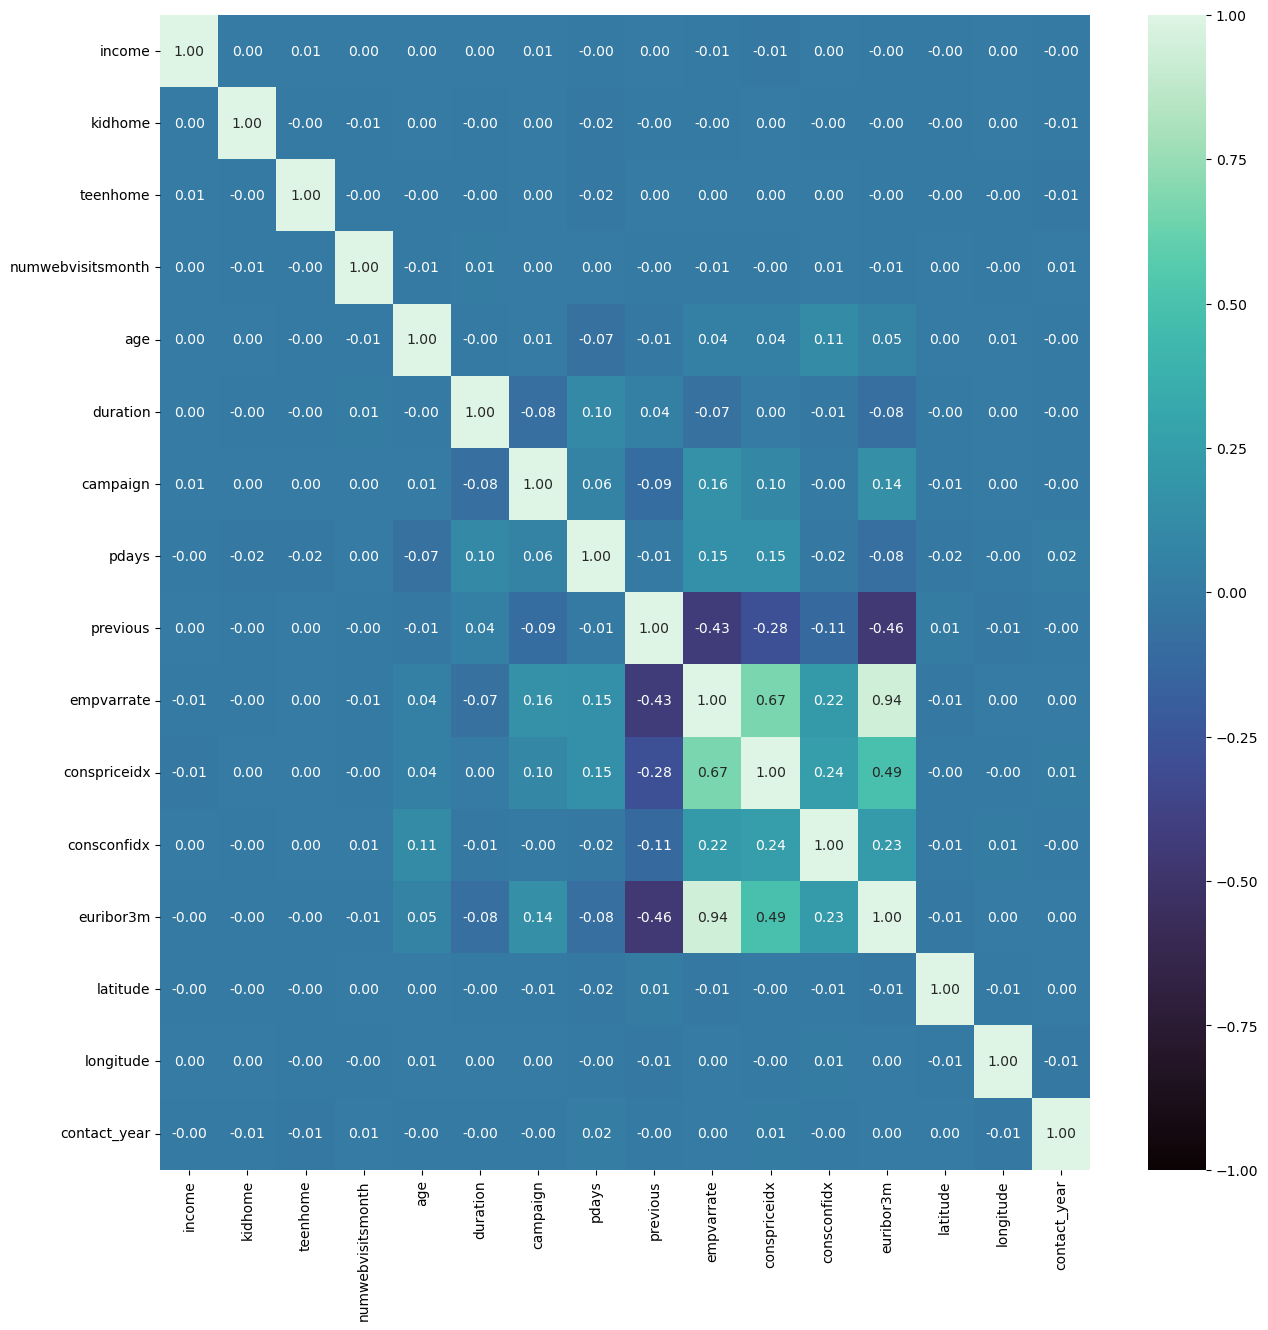

In [13]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

Sigue siendo una tabla bastante grande, vamos a intentar reducirla un poco. Y es que si nos fijamos, tenemos una diagonal de 1, y lo que tenemos por arriba y por debajo de la diagonal es la misma información, es como un espejo. Por lo que vamos a "eliminar" una de las partes, para eso vamos a usar el parámetro `mask` del `heatmap`. 

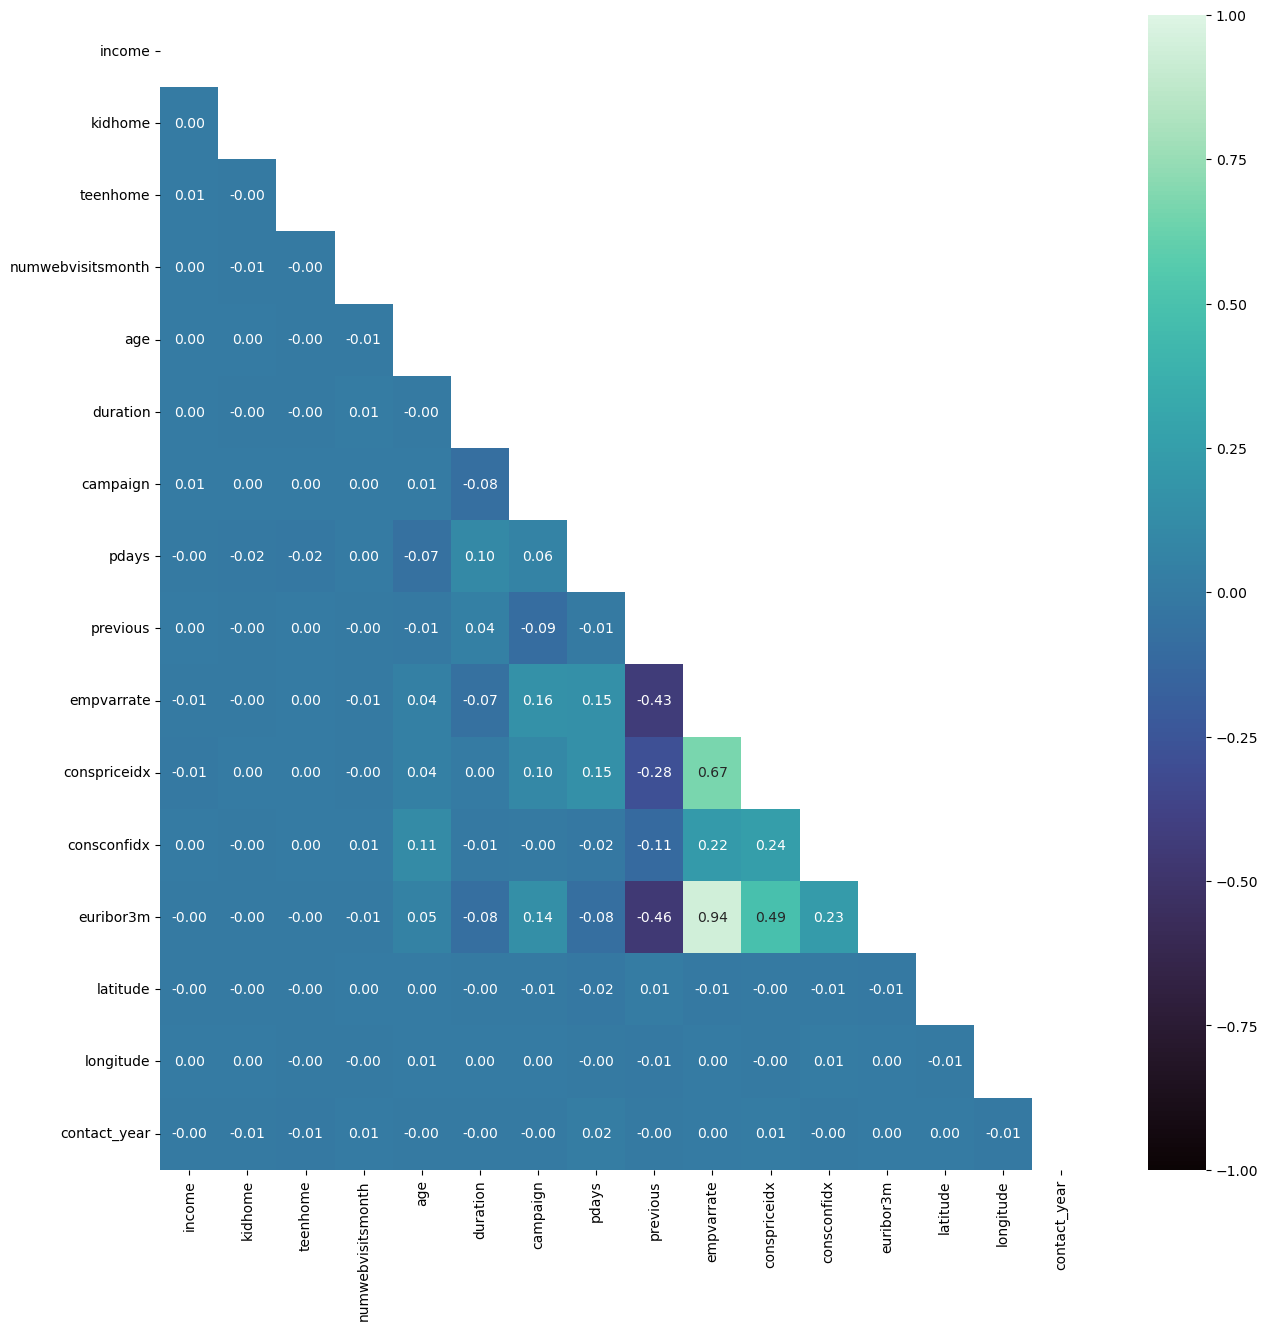

In [14]:
# AHORA YA PODREMOS ENTENDER DE UNA FORMA MÁS AMIGABLE LOS RESULTADOS DE LA MATRIZ DE CORRELACIÓN
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 
